In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
import pickle
data=pickle.load(open('processed_data.p', "rb" ))
data.head(3)

,Country,Location,Resource Type,floor,Department,seatName,Space,Datetime
0,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_1_02,0,2018-03-01
1,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_2_02,0,2018-03-01
2,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_2_07,0,2018-03-01


In [14]:
trial_data=data.loc[data['seatName']=='B5_9_1_05']
print(len(trial_data))
trial_data=trial_data.sort_values(['Datetime'])
trial_data=trial_data.drop(['Country','Location','Resource Type','floor','Department','seatName','Datetime'],axis=1)
trial_data=trial_data.values
#trial_data.set_index('Datetime',inplace=True)

4464


In [15]:
train_size=int(len(trial_data)*0.85)
train_data,test_data=trial_data[0:train_size,:], trial_data[train_size:len(trial_data),:]
print(train_size,len(train_data),len(test_data))

3794 3794 670


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
print(X_train)
X_test, y_test = create_dataset(test_data, look_back)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [18]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [44]:
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Dense
from keras.layers.normalization import BatchNormalization

def arch():
    seq = Sequential()
    #seq.add(LSTM(4,input_shape=(1,look_back)))
    seq.add(LSTM(8,input_shape=(1,look_back)))

    seq.add(Dense(1, activation='sigmoid'))
    seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return seq


model=arch()
batch_size = 32
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=100,shuffle=False,
          validation_data=(X_test, y_test))


Train on 3792 samples, validate on 668 samples
Epoch 1/100
3792/3792 [==============================] - 2s 425us/step - loss: 0.6563 - acc: 0.8808 - val_loss: 0.6213 - val_acc: 0.8458
Epoch 2/100
3792/3792 [==============================] - 1s 181us/step - loss: 0.5699 - acc: 0.8808 - val_loss: 0.5376 - val_acc: 0.8458
Epoch 3/100
3792/3792 [==============================] - 1s 180us/step - loss: 0.4776 - acc: 0.8808 - val_loss: 0.4566 - val_acc: 0.8458
Epoch 4/100
3792/3792 [==============================] - 1s 182us/step - loss: 0.3965 - acc: 0.8808 - val_loss: 0.3928 - val_acc: 0.8458
Epoch 5/100
3792/3792 [==============================] - 1s 187us/step - loss: 0.3364 - acc: 0.8808 - val_loss: 0.3468 - val_acc: 0.8458
Epoch 6/100
3792/3792 [==============================] - 1s 180us/step - loss: 0.2937 - acc: 0.8808 - val_loss: 0.3123 - val_acc: 0.8458
Epoch 7/100
3792/3792 [==============================] - 1s 177us/step - loss: 0.2621 - acc: 0.8808 - val_loss: 0.2848 - val_acc: 0

3792/3792 [==============================] - 1s 184us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 61/100
3792/3792 [==============================] - 1s 180us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 62/100
3792/3792 [==============================] - 1s 186us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 63/100
3792/3792 [==============================] - 1s 196us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 64/100
3792/3792 [==============================] - 1s 179us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 65/100
3792/3792 [==============================] - 1s 173us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 66/100
3792/3792 [==============================] - 1s 179us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.2200 - val_acc: 0.9341
Epoch 67/100
3792/3792 [=======================

In [42]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

668/668 [==============================] - 0s 96us/step
Test score: 0.22009943301850807
Test accuracy: 0.9341317365269461


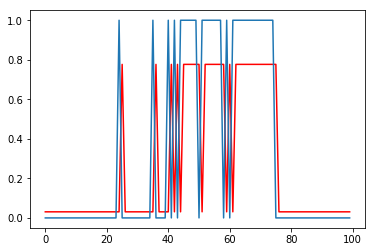

In [32]:
import matplotlib.pyplot as plt
testPredict = model.predict(X_test)
plt.plot(testPredict[300:400],color='r')
plt.plot(y_test[300:400])
plt.show();